## check on colab:
https://colab.research.google.com/drive/1Iyprbe-2Q7ZydkXF0ScprdMfATWxhpLl?usp=sharing

# WikiArt Impressionism Dataset Curation

This notebook processes the WikiArt dataset to create a curated subset of Impressionist paintings.

**Requirements:**
- High-RAM runtime (recommended: 25-50GB)
- Google Drive mounted for cache storage
- Hugging Face account token

In [1]:
# Install required packages
!pip install -q datasets pillow huggingface-hub tqdm

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set up Hugging Face credentials
from huggingface_hub import login

# Replace with your token from https://huggingface.co/settings/tokens
HF_TOKEN = "your_hf_token"  # @param {type:"string"}
login(HF_TOKEN)

In [14]:
# Clone the repository and set up paths
import os
import sys
from pathlib import Path

# Create project directory if it doesn't exist
project_dir = Path('/content/drive/MyDrive/fine-tuning')
project_dir.mkdir(parents=True, exist_ok=True)

# Clone if not exists
if not (project_dir / '.git').exists():
    !cd {project_dir} && git clone https://github.com/dolphinium/flux-impressionism-finetuning.git .

# Add project root to Python path
sys.path.append(str(project_dir))

Cloning into '.'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 54 (delta 18), reused 49 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 85.24 KiB | 1.64 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [13]:
# !rm -rf /content/drive/MyDrive/fine-tuning

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Processing images: 0it [00:00, ?it/s]


Dataset Statistics:
Total images: 1000

Genre Distribution:
genre
4    300
6    300
1    200
9    200
Name: count, dtype: int64


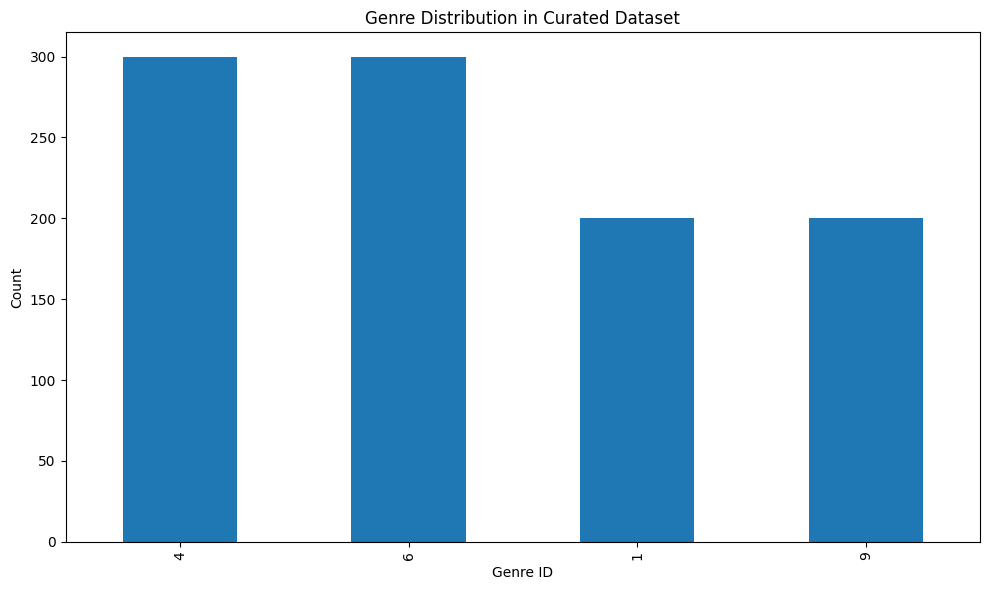

In [15]:

# Import required libraries
import logging
from src.data.dataset_curator import DatasetCurator
import pandas as pd
import matplotlib.pyplot as plt


# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

# Initialize with Google Drive cache directory
cache_dir = project_dir / 'cache'
curator = DatasetCurator(cache_dir=str(cache_dir))

try:
    # Process dataset
    dataset = curator.process_dataset()

    # Print dataset statistics
    print("\nDataset Statistics:")
    print(f"Total images: {len(dataset)}")

    # Convert to pandas for analysis
    df = dataset.to_pandas()

    # Genre distribution
    genre_counts = df['genre'].value_counts()
    print("\nGenre Distribution:")
    print(genre_counts)

    # Plot genre distribution
    plt.figure(figsize=(10, 6))
    genre_counts.plot(kind='bar')
    plt.title('Genre Distribution in Curated Dataset')
    plt.xlabel('Genre ID')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

except Exception as e:
    logging.error(f"Error processing dataset: {e}")
    raise

In [16]:
# Upload to Hugging Face Hub
try:
    repo_name = "dolphinium/wikiart-impressionism-curated"
    private = False

    print(f"\nUploading dataset to {repo_name}...")
    repo_url = curator.upload_to_hub(dataset, repo_name, private=private)
    print(f"Successfully uploaded dataset to: {repo_url}")

except Exception as e:
    logging.error(f"Error uploading to Hugging Face Hub: {e}")
    raise


Uploading dataset to dolphinium/wikiart-impressionism-curated...


Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Successfully uploaded dataset to: https://huggingface.co/datasets/dolphinium/wikiart-impressionism-curated


## RUN SUMMARY

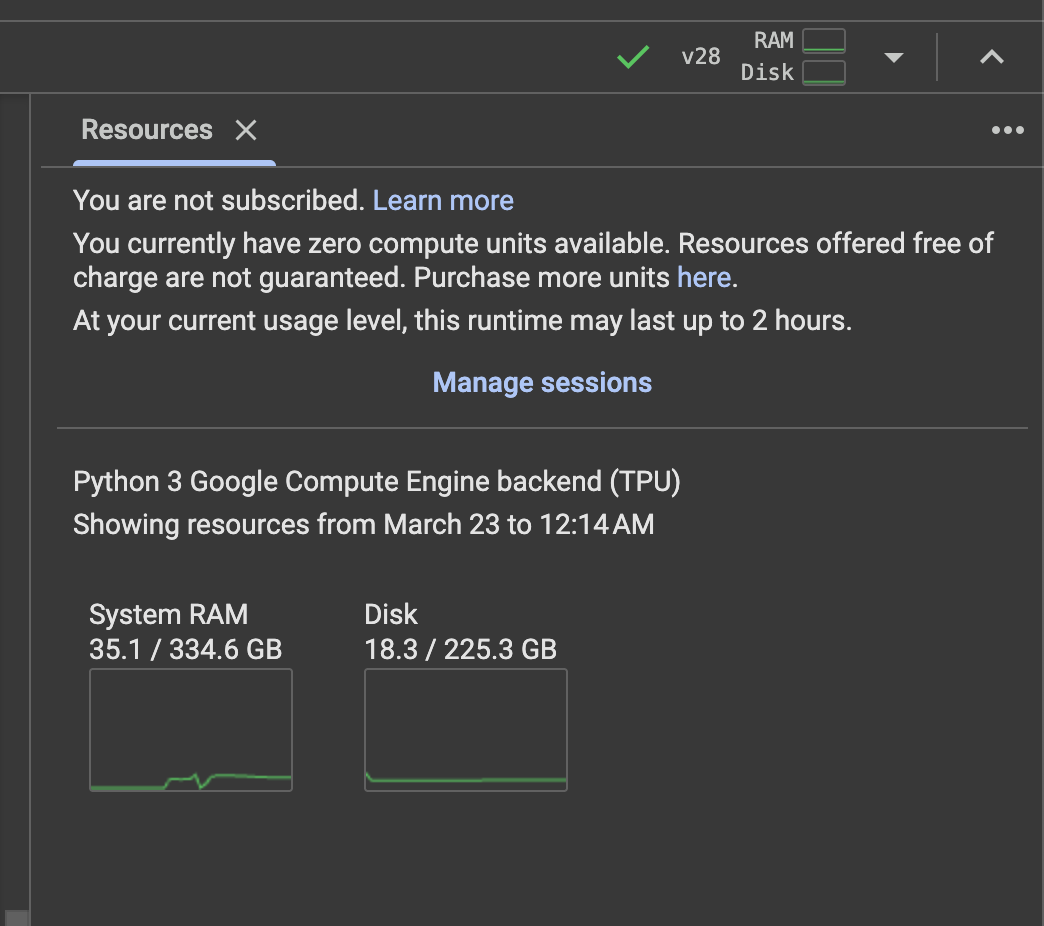